## **Client: ABC Tech | Category: ITSM - ML Project Ref: PM-PR-0012**

About the dataset:
             -The data set is about the ticket or incident management of the company ABC TECH Management. This data set has 25 columns, all of which are 'object' datatypes. Most of these 25 columns are categorical, and some of them are date and time.

## DATA PREPARATION-IMPORTING NECESSARY LIBRARIES

In [1]:
# Importing the necessary libraries

# Pandas for data manipulation
import pandas as pd

# NumPy for numerical operations
import numpy as np

# Datetime for working with date and time
import datetime as dt

# Matplotlib for creating plots
import matplotlib.pyplot as plt

# Warnings to suppress warning messages
import warnings
warnings.filterwarnings('ignore')

# MySQL connector libraries
import mysql.connector
import pymysql


# Run this cell if necessary; if libraries are not installed.

In [ ]:
# Install the PyMySQL package
! pip install PyMySQL

# Install the ipython-sql package
! pip install ipython-sql

# Install the mysqlclient package
! pip install mysqlclient

# Install the mysql-connector-python package
! pip install mysql-connector-python

# Install the pymysql package
! pip install pymysql


## Importing raw data into a data frame from MySQL database

In [2]:
# Establish a connection to the MySQL database
mydb = mysql.connector.connect(
    host="18.136.157.135",
    user="dm_team",
    password="DM!$Team@&27920!",
    database="project_itsm"
)

# Create a cursor
mycursor = mydb.cursor()

# Execute the SQL query to show table names
mycursor.execute("SHOW TABLES;")

# Fetch the results
myresult = mycursor.fetchall()

# Print the table names
for x in myresult:
    print(x)


('dataset_list',)


In [3]:
# Execute SQL query to select all data from the "dataset_list" table and read it into a DataFrame
sql = "SELECT * FROM dataset_list"
df = pd.read_sql(sql, mydb)


# Exploratory Data Analysis on the data set

# Basic insights of the data 

In [4]:
# Display the first 5 rows of the DataFrame "df"
df.head(5)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [5]:
# Retrieve the shape (number of rows and columns) of the DataFrame "df"
df.shape

(46606, 25)

In [6]:
# Retrieve and display the column names of the DataFrame "df"
df.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [7]:
# Looking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [8]:
# Generate summary statistics for all columns (including non-numeric) and transpose the result
df.describe(include='all').T

,count,unique,top,freq
CI_Name,46606,3019,SUB000456,3050
CI_Cat,46606,13,application,32900
CI_Subcat,46606,65,Server Based Application,18811
WBS,46606,274,WBS000073,13342
Incident_ID,46606,46606,IM0000004,1
Status,46606,2,Closed,46597
Impact,46606,6,4,22556
Urgency,46606,6,4,22588
Priority,46606,6,4,22717
number_cnt,46606,46606,0.601292279,1


In [9]:
# checking for duplicates in the dataframe
print('The no of duplicates in the data:',df.duplicated().sum())

The no of duplicates in the data: 0


In [10]:
# checking for null values in the dataframe
df.isnull().sum()


CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Related_Change                0
dtype: int64

General observations on basic insights from the data:
1. There are no missing values in the dataframe.
2. There are no duplicate rows in the dataframe.
3. As there are no numerical values in the independent variables, there is no need to handle outliers.

## Task 1


## 1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces. 

All the features are not necessary to predict priority. The features, such as CI_Cat,CI_Subcat, WBS, and Category, are necessary to predict the target variable, 'Priority'.

## Data preprocessing

In [11]:
unique_values = df['CI_Cat'].unique()  # Get the unique values in the 'CI_Cat' column
print(unique_values)

['subapplication' 'application' 'computer' '' 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']


In [12]:
# Replace 'database' with 'storage' in the 'CI_Cat' column
df.CI_Cat.replace(['database'], 'storage', inplace=True)

# Replace 'applicationcomponent' with 'subapplication' in the 'CI_Cat' column
df.CI_Cat.replace(['applicationcomponent'], 'subapplication', inplace=True)

# Replace 'displaydevice', 'officeelectronics', 'Phone', and 'networkcomponents' with 'hardware' in the 'CI_Cat' column
df.CI_Cat.replace(['displaydevice', 'officeelectronics', 'Phone', 'networkcomponents'], 'hardware', inplace=True)

# Replace missing values (NaN) with 'application' in the 'CI_Cat' column
df.CI_Cat.replace([np.nan,''], 'application', inplace=True)

In [13]:
unique_values = df['CI_Cat'].unique()  # Get the unique values in the 'CI_Cat' column after replacement
print(unique_values)


['subapplication' 'application' 'computer' 'hardware' 'software' 'storage']


In [14]:
unique_values_subcat = df['CI_Subcat'].unique()  # Get the unique values in the 'CI_Subcat' column
print(unique_values_subcat)

['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' '' 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 'Controller'
 'DataCenterEquipment' 'KVM Switches' 'Switch' 'Database Software'
 'Network Component' 'Unix Server' 'Lines' 'ESX Cluster' 'zOS Server'
 'SharePoint Farm' 'NonStop Server' 'Application Server'
 'Security Software' 'Thin Client' 'zOS Cluster' 'Router' 'VMWare'
 'Net Device' 'Neoview Server' 'MQ Queue Manager' 'UPS' 'Number'
 'Iptelephony' 'Windows Server in extern beheer' 'Modem' 'X86 Server'
 'ESX Server' 'Virtual Tape Server' 'IPtelephony' 'NonStop Harddisk'
 'Firewall' 'RAC Service' 'zOS Systeem' 'Instance' 'NonStop Storage'
 'Protocol' 'Tape Library']


In [15]:
# Replace 'Desktop' with 'Desktop Application' in the 'CI_Subcat' column
df.CI_Subcat.replace('Desktop', 'Desktop Application', inplace=True)

# Replace a list of values with 'Server Based Application' in the 'CI_Subcat' column
df.CI_Subcat.replace(['Application Server', 'Virtual Tape Server', 'ESX Server', 'zOS Server', 'Neoview Server',
                     'X86 Server', 'Unix Server', 'Oracle Server', 'Windows Server in extern beheer', 'Thin Client',
                     'NonStop Server', 'Number', 'Windows Server', 'Linux Server', np.nan, 'SharePoint Farm', 'Lines'],
                    'Server Based Application', inplace=True)

# Replace 'RAC Service' with 'Banking Device' in the 'CI_Subcat' column
df.CI_Subcat.replace('RAC Service', 'Banking Device', inplace=True)

# Replace a list of values with 'Web Based Application' in the 'CI_Subcat' column
df.CI_Subcat.replace(['Iptelephony', 'Protocol', 'Net Device', 'IPtelephony', 'ESX Cluster', 'Standard Application'],
                    'Web Based Application', inplace=True)

# Replace a list of values with 'System Software' in the 'CI_Subcat' column
df.CI_Subcat.replace(['VMWare', 'Security Software', 'zOS Systeem', 'Firewall', 'Database Software', 'VDI', 'Instance',
                     'MQ Queue Manager', 'Automation Software', 'Citrix', 'SAP', 'Encryption'],
                    'System Software', inplace=True)

# Replace a list of values with 'Client Based Application' in the 'CI_Subcat' column
df.CI_Subcat.replace(['UPS', 'Omgeving'], 'Client Based Application', inplace=True)

# Replace a list of values with 'Database' in the 'CI_Subcat' column
df.CI_Subcat.replace(['NonStop Storage', 'NonStop Harddisk', 'Tape Library', 'zOS Cluster', 'DataCenterEquipment',
                     'MigratieDummy'],
                    'Database', inplace=True)

# Replace 'Modem' and 'Router' with 'Network Component' in the 'CI_Subcat' column
df.CI_Subcat.replace(['Modem', 'Router'], 'Network Component', inplace=True)

# Replace 'KVM Switches' with 'Switch' in the 'CI_Subcat' column
df.CI_Subcat.replace('KVM Switches', 'Switch', inplace=True)

In [16]:
unique_values_subcat = df['CI_Subcat'].unique()  # Get the unique values in the 'CI_Subcat' column after replacement
print(unique_values_subcat)


['Web Based Application' 'Desktop Application' 'Server Based Application'
 'System Software' 'Client Based Application' 'Laptop' '' 'Monitor' 'SAN'
 'Banking Device' 'Database' 'Keyboard' 'Printer' 'Exchange' 'Scanner'
 'Controller' 'Switch' 'Network Component']


In [17]:
# Count and print the unique values and their counts in the 'Priority' column
value_counts = df['Priority'].value_counts()
print(value_counts)

4     22717
5     16486
3      5323
NA     1380
2       697
1         3
Name: Priority, dtype: int64


In [18]:
df.Priority.replace('NA','5', inplace=True)

In [19]:
# Count and print the unique values and their counts in the 'Priority' column AFTER REPLACEMENT
value_counts = df['Priority'].value_counts()
print(value_counts)

4    22717
5    17866
3     5323
2      697
1        3
Name: Priority, dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()

df.CI_Cat = lc.fit_transform(df.CI_Cat)  # Encode the 'CI_Cat' column
df.CI_Subcat = lc.fit_transform(df.CI_Subcat)  # Encode the 'CI_Subcat' column
df.WBS = lc.fit_transform(df.WBS)  # Encode the 'WBS' column
df.Category = lc.fit_transform(df.Category)  # Encode the 'Category' column

In [21]:
X = df.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]  # Create the feature matrix 'X' with selected columns
Y = df.Priority  # Create the target variable 'Y' for priority prediction

In [22]:
## Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
# Standardization technique: Scale the features using StandardScaler for both training and testing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Display the shape (dimensions) of the training feature matrix 'X_train'
X_train.shape

(37284, 4)

In [25]:
# Display the shape (dimensions) of the testing feature matrix 'X_test'
X_test.shape

(9322, 4)

## MODEL BUILDING

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Create a Logistic Regression classifier
clf = LogisticRegression()

# Train the classifier on the training data
clf.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Predict on the test data
y_pred = clf.predict(X_test)

# Perform predictions on test data
y_hat = clf.predict(X_test)

# Perform predictions on training data
y_train_predict = clf.predict(X_train)
# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00       554
           3       0.00      0.00      0.00      4223
           4       0.60      0.93      0.73     18195
           5       0.77      0.48      0.59     14309

    accuracy                           0.64     37284
   macro avg       0.27      0.28      0.26     37284
weighted avg       0.59      0.64      0.58     37284

Classification Report - Test Data:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       143
           3       0.00      0.00      0.00      1100
           4       0.60      0.93      0.73      4522
           5       0.78      0.49      0.60      3557

    accuracy                           0.64      9322
   macro avg       0.34      0.36      0.33      9322
weighted avg       0.59      0.64      0.58      9322



### DecisionTree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Create a Decision Tree classifier
clf_dt = DecisionTreeClassifier()

# Train the classifier on the training data
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# Predict on the test data
y_pred_dt = clf_dt.predict(X_test)

# Perform predictions on training data
y_train_predict_dt = clf_dt.predict(X_train)

# Evaluate the Decision Tree model using classification metrics
print("Decision Tree - Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict_dt))  # Precision, recall, F1 scores, and accuracy

print("Decision Tree - Classification Report - Test Data:")
print(classification_report(y_test, y_pred_dt))  # Precision, recall, F1 scores, and accuracy

Decision Tree - Classification Report - Training Data:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.50      0.64      0.56       554
           3       0.66      0.62      0.64      4223
           4       0.81      0.91      0.86     18195
           5       0.89      0.76      0.82     14309

    accuracy                           0.81     37284
   macro avg       0.57      0.59      0.58     37284
weighted avg       0.82      0.81      0.81     37284

Decision Tree - Classification Report - Test Data:
              precision    recall  f1-score   support

           2       0.48      0.61      0.54       143
           3       0.67      0.61      0.64      1100
           4       0.82      0.91      0.86      4522
           5       0.88      0.77      0.82      3557

    accuracy                           0.82      9322
   macro avg       0.71      0.72      0.71      9322
weighted avg       0.82  

### Support Vector Machine

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score,precision_score,recall_score

# Create an SVM classifier
clf_svc = SVC()

# Train the classifier on the training data
clf_svc.fit(X_train, y_train)

SVC()

In [31]:
# Predict on the test data
y_pred = clf_svc.predict(X_test)

# Perform predictions on test data
y_hat = clf_svc.predict(X_test)

# Perform predictions on training data
y_train_predict = clf_svc.predict(X_train)

# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.48      0.59      0.53       554
           3       0.54      0.30      0.39      4223
           4       0.70      0.90      0.79     18195
           5       0.86      0.65      0.74     14309

    accuracy                           0.73     37284
   macro avg       0.52      0.49      0.49     37284
weighted avg       0.74      0.73      0.72     37284

Classification Report - Test Data:
              precision    recall  f1-score   support

           2       0.47      0.59      0.53       143
           3       0.55      0.31      0.39      1100
           4       0.70      0.91      0.79      4522
           5       0.86      0.66      0.75      3557

    accuracy                           0.74      9322
   macro avg       0.65      0.62      0.62      9322
weighted avg       0.74      0.74      0.73      9322



### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Create a Random Forest classifier
clf_rf = RandomForestClassifier()

# Train the classifier on the training data
clf_rf.fit(X_train, y_train)


RandomForestClassifier()

In [33]:

# Predict on the test data
y_pred = clf_rf.predict(X_test)

# Perform predictions on test data
y_hat = clf_rf.predict(X_test)

# Perform predictions on training data
y_train_predict = clf_rf.predict(X_train)

# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.50      0.63      0.56       554
           3       0.66      0.62      0.64      4223
           4       0.81      0.91      0.86     18195
           5       0.88      0.76      0.82     14309

    accuracy                           0.81     37284
   macro avg       0.57      0.58      0.58     37284
weighted avg       0.82      0.81      0.81     37284

Classification Report - Test Data:
              precision    recall  f1-score   support

           2       0.47      0.59      0.53       143
           3       0.67      0.60      0.64      1100
           4       0.82      0.91      0.86      4522
           5       0.88      0.77      0.82      3557

    accuracy                           0.82      9322
   macro avg       0.71      0.72      0.71      9322
weighted avg       0.82      0.82      0.81      9322



## MODEL COMPARISION REPORT FOR TASK 1

    Four machine learning models, Logistic Regression, Decision Tree, Support Vector Machine (SVM), and Random Forest Classifier, were evaluated on a classification task using training and test data. The classification task involves five classes (1 to 5). Below is a comparison of these models based on their performance metrics:

1.Logistic Regression:
Training Data:
Accuracy: 0.64
F1-score for class 4: 0.73
F1-score for class 5: 0.59
Test Data:
Accuracy: 0.64
F1-score for class 4: 0.73
F1-score for class 5: 0.60

2.Decision Tree:
Training Data:
Accuracy: 0.81
F1-score for class 4: 0.86
F1-score for class 5: 0.82
Test Data:
Accuracy: 0.82
F1-score for class 4: 0.86
F1-score for class 5: 0.82

3.Support Vector Machine:
Training Data:
Accuracy: 0.73
F1-score for class 4: 0.79
F1-score for class 5: 0.74
Test Data:
Accuracy: 0.74
F1-score for class 4: 0.79
F1-score for class 5: 0.75

4.Random Forest Classifier:
Training Data:
Accuracy: 0.81
F1-score for class 4: 0.86
F1-score for class 5: 0.82
Test Data:
Accuracy: 0.82
F1-score for class 4: 0.86
F1-score for class 5: 0.82

Comparison:
Accuracy:
All models (Decision Tree, SVM, and Random Forest Classifier) outperformed Logistic Regression in terms of accuracy, with scores around 0.81-0.82, while Logistic Regression had an accuracy of 0.64.

F1-scores:
Decision Tree, SVM, and Random Forest Classifier consistently outperformed Logistic Regression in terms of F1-scores for class 4 and 5 in both training and test data. They achieved F1-scores of 0.86 and 0.82 for class 4 and 5, respectively, while Logistic Regression had lower F1-scores for these classes.

Decision Tree vs. SVM vs. Random Forest: Decision Tree, SVM, and Random Forest Classifier showed similar performance, with nearly identical accuracy and F1-scores. Decision Tree had slightly better recall for class 2 on the test data.

In summary, Decision Tree, SVM, and Random Forest Classifier appear to be more effective for this classification task compared to Logistic Regression, with Decision Tree having a slight edge in terms of overall performance. These models offer higher accuracy and better F1-scores, particularly for the more critical classes (class 4 and 5). The choice between Decision Tree, SVM, and Random Forest may depend on other considerations such as interpretability, computational resources, and the specific requirements of application.

# TASK 2

### 2.2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared                 with resources and technology planning.

In [34]:
# Imporing the necessary columns
frq_incident = df.loc[:,['Incident_ID','Open_Time']]

In [35]:
# Display the first few rows of the frq_incident DataFrame
frq_incident.head()

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01


In [36]:
# Coverting all the values in proper Datetime format
for i in range(len(frq_incident.Open_Time)):
    if (frq_incident.Open_Time[i][1]=='/'):
        frq_incident.Open_Time[i] = dt.datetime.strptime(frq_incident.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (frq_incident.Open_Time[i][2]=='/'):
        frq_incident.Open_Time[i] = dt.datetime.strptime(frq_incident.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        frq_incident.Open_Time[i] = dt.datetime.strptime(frq_incident.Open_Time[i],'%d-%m-%Y %H:%M').date()

In [37]:
# Display the first few rows of the frq_incident DataFrame
frq_incident.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [38]:
# Adding a new column which will have the number of tickets per day
frq_incident['No_Incidents'] = frq_incident.groupby('Open_Time')['Incident_ID'].transform('count')

In [39]:
# Remove the 'Incident_ID' column from the 'frq_incident' DataFrame.
frq_incident.drop(['Incident_ID'], axis=1, inplace=True)

# Remove duplicate rows from the 'frq_incident' DataFrame.
frq_incident.drop_duplicates(inplace=True)

In [40]:
# Display the first few rows of the frq_incident DataFrame
frq_incident.head()

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2


In [41]:
frq_incident.shape

(331, 2)

In [42]:
# Renaming columns in the DataFrame 'frq_incident' for Prophet model compatibility.
frq_incident.rename(columns={'Open_Time': 'ds', 'No_Incidents': 'y'}, inplace=True)


In [43]:
#pip install prophet

10:31:17 - cmdstanpy - INFO - Chain [1] start processing
10:31:17 - cmdstanpy - INFO - Chain [1] done processing


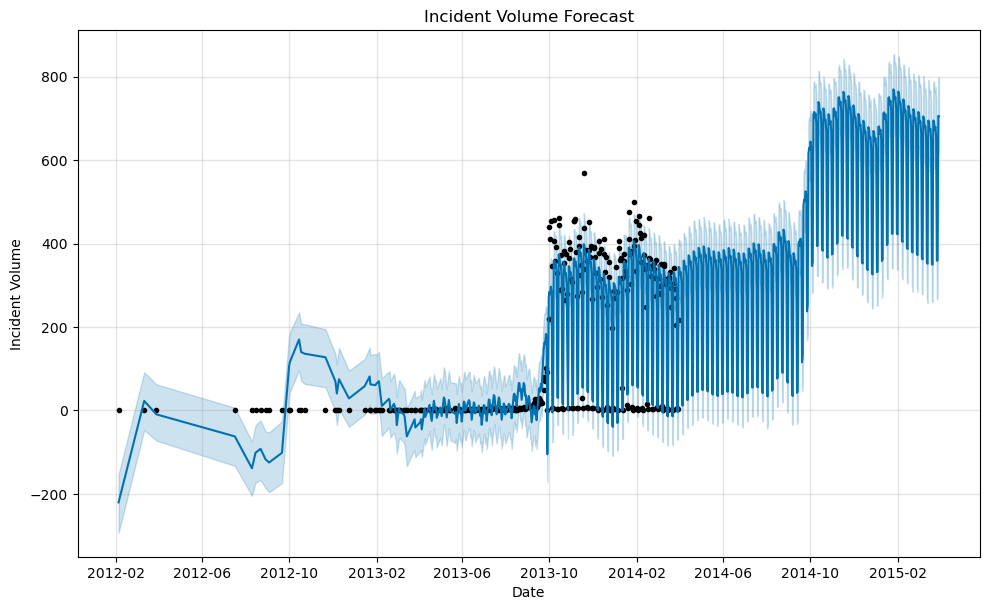

In [44]:

from prophet import Prophet
import matplotlib.pyplot as plt


# Create a Prophet model
model = Prophet()

# Fit the model with your data
model.fit(frq_incident)

# Create a DataFrame with future dates for forecasting
future = model.make_future_dataframe(periods=365)  # 

# Make predictions for the future dates
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Incident Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Incident Volume')
plt.show()

In [45]:
from prophet.diagnostics import cross_validation, performance_metrics
# Perform cross-validation and calculate performance metrics for the Prophet model.
df_cv = cross_validation(model, horizon='90 days', period='30 days', initial='331 days')
performance = performance_metrics(df_cv)
print(performance)


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/13 [00:00<?, ?it/s]

10:31:19 - cmdstanpy - INFO - Chain [1] start processing
10:31:38 - cmdstanpy - INFO - Chain [1] done processing
10:31:38 - cmdstanpy - INFO - Chain [1] start processing
10:31:39 - cmdstanpy - INFO - Chain [1] done processing
10:31:39 - cmdstanpy - INFO - Chain [1] start processing
10:31:39 - cmdstanpy - INFO - Chain [1] done processing
10:31:39 - cmdstanpy - INFO - Chain [1] start processing
10:31:40 - cmdstanpy - INFO - Chain [1] done processing
10:31:40 - cmdstanpy - INFO - Chain [1] start processing
10:31:40 - cmdstanpy - INFO - Chain [1] done processing
10:31:41 - cmdstanpy - INFO - Chain [1] start processing
10:31:41 - cmdstanpy - INFO - Chain [1] done processing
10:31:42 - cmdstanpy - INFO - Chain [1] start processing
10:31:42 - cmdstanpy - INFO - Chain [1] done processing
10:31:42 - cmdstanpy - INFO - Chain [1] start processing
10:31:42 - cmdstanpy - INFO - Chain [1] done processing
10:31:43 - cmdstanpy - INFO - Chain [1] start processing
10:31:43 - cmdstanpy - INFO - Chain [1]

   horizon           mse        rmse         mae      mape     mdape  \
0  11 days   7705.073793   87.778550   54.243155  5.703105  0.472364   
1  12 days   8418.100419   91.750207   55.544872  6.672730  0.491676   
2  13 days   9185.562331   95.841339   56.728175  6.657297  0.546093   
3  14 days   8657.492532   93.045648   54.757792  5.484775  0.565111   
4  15 days   8593.959584   92.703611   54.416102  3.872442  0.530264   
..     ...           ...         ...         ...       ...       ...   
75 86 days  25782.502112  160.569306  102.100574  7.922837  0.986237   
76 87 days  26854.771889  163.874256  105.923791  7.853918  0.986752   
77 88 days  26377.212811  162.410630  105.555169  8.068029  0.987610   
78 89 days  27419.844423  165.589385  107.070133  7.592209  0.987278   
79 90 days  28584.310649  169.068952  109.711970  6.881208  0.986835   

       smape  coverage  
0   0.780942  0.275261  
1   0.815621  0.268293  
2   0.841056  0.288618  
3   0.865531  0.296748  
4   0.8776

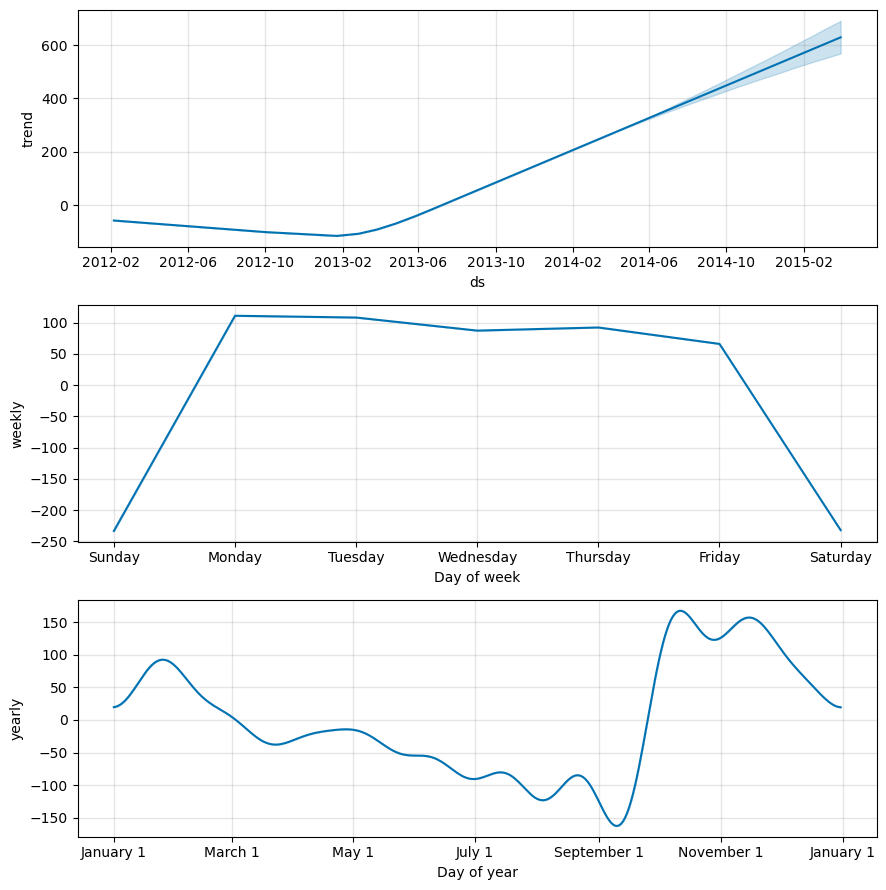

In [46]:
# Plot components of the forecasted data using the Prophet model and display the plot.
model.plot_components(forecast)
plt.show()


TASK 2:
-Based on the provided data for the years 2012, 2013, and 2014, the number of incidents increased after the year 2014, and the number of incidents seems going up after that.
-Based on the provided data, the number of incidents has been high through the weekdays.

# TASK 3

### 3.  Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be               reduced.

In [47]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder from scikit-learn
lc = LabelEncoder()  # Create a LabelEncoder object

df.CI_Cat = lc.fit_transform(df.CI_Cat)  # Encode the 'CI_Cat' column
df.WBS = lc.fit_transform(df.WBS)  # Encode the 'WBS' column
df.Category = lc.fit_transform(df.Category)  # Encode the 'Category' column
df.Incident_ID = lc.fit_transform(df.Incident_ID)  # Encode the 'Incident_ID' column
df.CI_Subcat = lc.fit_transform(df.CI_Subcat)  # Encode the 'CI_Subcat' column
df.Impact = lc.fit_transform(df.Impact)  # Encode the 'Impact' column
df.Urgency = lc.fit_transform(df.Urgency)  # Encode the 'Urgency' column
df.Priority = lc.fit_transform(df.Priority)  # Encode the 'Priority' column


In [48]:
# Select specific columns 'CI_Cat', 'WBS', 'Incident_ID', 'Category', 'Impact', 'Urgency', 'Priority' from the DataFrame and assign it to X2.
X2 = df.loc[:,['CI_Cat','WBS','Incident_ID','Category','Impact','Urgency','Priority']]

# Assign the 'CI_Subcat' column from the DataFrame to Y2.
Y2 = df.CI_Subcat


In [49]:
## Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X2,Y2,test_size=0.2,random_state=42)

In [50]:
# Standardization technique
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## DecisionTree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Create a Decision Tree classifier
clf_dt = DecisionTreeClassifier()

# Train the classifier on the training data
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
# Predict on the test data
y_pred_dt = clf_dt.predict(X_test)

# Perform predictions on training data
y_train_predict_dt = clf_dt.predict(X_train)

# Evaluate the Decision Tree model using classification metrics
print("Decision Tree - Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict_dt))  # Precision, recall, F1 scores, and accuracy

print("Decision Tree - Classification Report - Test Data:")
print(classification_report(y_test, y_pred_dt))  # Precision, recall, F1 scores, and accuracy

Decision Tree - Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       731
           2       1.00      1.00      1.00       453
           3       1.00      1.00      1.00       115
           4       1.00      1.00      1.00       460
           5       1.00      1.00      1.00      3415
           6       1.00      1.00      1.00       110
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00      1520
           9       1.00      1.00      1.00       172
          10       1.00      1.00      1.00        41
          11       1.00      1.00      1.00        72
          12       1.00      1.00      1.00       435
          13       1.00      1.00      1.00        52
          14       1.00      1.00      1.00     15309
          15       1.00      1.00      1.00        46
          16       1.00   

### Support Vector Machine

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score,precision_score,recall_score

# Create an SVM classifier
clf_svc = SVC()

# Train the classifier on the training data
clf_svc.fit(X_train, y_train)

SVC()

In [54]:
# Predict on the test data
y_pred = clf_svc.predict(X_test)

# Perform predictions on test data
y_hat = clf_svc.predict(X_test)

# Perform predictions on training data
y_train_predict = clf_svc.predict(X_train)

# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.78      0.89      0.83       731
           2       0.72      0.09      0.15       453
           3       0.62      0.91      0.74       115
           4       0.77      0.80      0.78       460
           5       0.53      0.33      0.41      3415
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00        19
           8       0.75      0.96      0.84      1520
           9       0.63      0.94      0.75       172
          10       0.53      0.24      0.33        41
          11       0.36      0.38      0.37        72
          12       0.92      0.87      0.89       435
          13       0.95      0.35      0.51        52
          14       0.75      0.72      0.74     15309
          15       0.50      0.28      0.36        46
          16       0.61      0.25      0.3

Model Comparison Report:

Decision Tree vs. Support Vector Machine (SVM)

Accuracy:

Decision Tree (Training Data): 100%
Decision Tree (Test Data): 88%
SVM (Training Data): 71%
SVM (Test Data): 71%
In terms of accuracy, the Decision Tree model performs significantly better than the SVM model on both the training and test data.

Precision:

Decision Tree (Training Data): High precision for all classes (average weighted precision of 1.00).
Decision Tree (Test Data): Generally high precision, but some classes have lower precision (average weighted precision of 0.88).
SVM (Training Data): Varied precision values for different classes (average weighted precision of 0.70).
SVM (Test Data): Varied precision values for different classes (average weighted precision of 0.70).
The Decision Tree model achieves higher precision for most classes on both training and test data compared to the SVM.

Recall:

Decision Tree (Training Data): High recall for all classes (average weighted recall of 1.00).
Decision Tree (Test Data): Generally high recall, but some classes have lower recall (average weighted recall of 0.88).
SVM (Training Data): Varied recall values for different classes (average weighted recall of 0.71).
SVM (Test Data): Varied recall values for different classes (average weighted recall of 0.71).
The Decision Tree model achieves higher recall for most classes on both training and test data compared to the SVM.

F1-Score:

Decision Tree (Training Data): High F1-score for all classes (average weighted F1-score of 1.00).
Decision Tree (Test Data): Generally high F1-scores, but some classes have lower scores (average weighted F1-score of 0.88).
SVM (Training Data): Varied F1-score values for different classes (average weighted F1-score of 0.69).
SVM (Test Data): Varied F1-score values for different classes (average weighted F1-score of 0.69).
The Decision Tree model achieves higher F1-scores for most classes on both training and test data compared to the SVM.

Summary:

The Decision Tree model outperforms the Support Vector Machine (SVM) model across all performance metrics, including accuracy, precision, recall, and F1-score. The Decision Tree model demonstrates perfect accuracy, precision, recall, and F1-scores on the training data, while the SVM model lags behind in terms of precision and recall, achieving an accuracy of 71%. On the test data, the Decision Tree maintains a high level of performance, while the SVM's performance remains consistent but lower than the Decision Tree.

Therefore, based on the classification reports, the Decision Tree model is the preferred choice for this classification task. However, it's important to consider other factors such as computational complexity and generalizability when choosing a model for a specific use case.

# TASK 4

### 4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

All the features are not necessary to predict No_of_Related_Changes. The following features such as 'CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents'are necessary to predict 'No_of_Related_Changes'.

In [55]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
# Encoding categorical variables using LabelEncoder
df.CI_Subcat=lc.fit_transform(df.CI_Subcat)
df.WBS=lc.fit_transform(df.WBS)
df.Priority=lc.fit_transform(df.Priority)
df.Category=lc.fit_transform(df.Category)
df.No_of_Related_Interactions=lc.fit_transform(df.No_of_Related_Interactions)
df.No_of_Related_Incidents=lc.fit_transform(df.No_of_Related_Incidents)

In [56]:
# Selecting the predictors
X1 = df.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
Y1 = df.No_of_Related_Changes

In [57]:
## Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

In [58]:
# Standardization technique is used
sc = StandardScaler()
X1_train = sc.fit_transform(X_train)
X1_test = sc.transform(X_test)

In [59]:
X1_train.shape

(37284, 6)

In [60]:
X1_test.shape


(9322, 6)

### LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Create a Logistic Regression classifier
clf = LogisticRegression()

# Train the classifier on the training data
clf.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Predict on the test data
y_pred = clf.predict(X_test)

# Perform predictions on test data
y_hat = clf.predict(X_test)

# Perform predictions on training data
y_train_predict = clf.predict(X_train)
# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

                   0.99      1.00      0.99     36824
           1       0.00      0.00      0.00       442
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.99     37284
   macro avg       0.20      0.20      0.20     37284
weighted avg       0.98      0.99      0.98     37284

Classification Report - Test Data:
              precision    recall  f1-score   support

                   0.99      1.00      0.99      9222
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.99      9322
   macro avg       0.25      0.25      0.25      9322
weighted avg       0.98      0.99      0.98      9322



### DecisionTree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Create a Decision Tree classifier
clf_dt = DecisionTreeClassifier()

# Train the classifier on the training data
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
# Predict on the test data
y_pred_dt = clf_dt.predict(X_test)

# Perform predictions on training data
y_train_predict_dt = clf_dt.predict(X_train)

# Evaluate the Decision Tree model using classification metrics
print("Decision Tree - Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict_dt))  # Precision, recall, F1 scores, and accuracy

print("Decision Tree - Classification Report - Test Data:")
print(classification_report(y_test, y_pred_dt))  # Precision, recall, F1 scores, and accuracy

Decision Tree - Classification Report - Training Data:
              precision    recall  f1-score   support

                   0.99      1.00      0.99     36824
           1       0.92      0.17      0.28       442
           2       1.00      0.06      0.12        16
           3       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.99     37284
   macro avg       0.78      0.45      0.48     37284
weighted avg       0.99      0.99      0.99     37284

Decision Tree - Classification Report - Test Data:
              precision    recall  f1-score   support

                   0.99      1.00      0.99      9222
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.99      9322
   macro avg       0.25      0.25      0.25      9322
weighted avg       0.98  

### Support Vector Machine

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score,precision_score,recall_score

# Create an SVM classifier
clf_svc = SVC()

# Train the classifier on the training data
clf_svc.fit(X_train, y_train)

SVC()

In [66]:
# Predict on the test data
y_pred = clf_svc.predict(X_test)

# Perform predictions on test data
y_hat = clf_svc.predict(X_test)

# Perform predictions on training data
y_train_predict = clf_svc.predict(X_train)

# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

                   0.99      1.00      0.99     36824
           1       0.00      0.00      0.00       442
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.99     37284
   macro avg       0.20      0.20      0.20     37284
weighted avg       0.98      0.99      0.98     37284

Classification Report - Test Data:
              precision    recall  f1-score   support

                   0.99      1.00      0.99      9222
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.99      9322
   macro avg       0.25      0.25      0.25      9322
weighted avg       0.98      0.99      0.98      9322



### RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Create a Random Forest classifier
clf_rf = RandomForestClassifier()

# Train the classifier on the training data
clf_rf.fit(X_train, y_train)


RandomForestClassifier()

In [68]:
# Predict on the test data
y_pred = clf_rf.predict(X_test)

# Perform predictions on test data
y_hat = clf_rf.predict(X_test)

# Perform predictions on training data
y_train_predict = clf_rf.predict(X_train)

# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

                   0.99      1.00      0.99     36824
           1       0.91      0.17      0.28       442
           2       1.00      0.06      0.12        16
           3       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.99     37284
   macro avg       0.78      0.45      0.48     37284
weighted avg       0.99      0.99      0.99     37284

Classification Report - Test Data:
              precision    recall  f1-score   support

                   0.99      1.00      0.99      9222
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1

    accuracy                           0.99      9322
   macro avg       0.25      0.25      0.25      9322
weighted avg       0.98      0.99      0.98      9322



## MODEL COMPARISION REPORT

Model Comparison Report:

Logistic Regression:

Training Data:
Accuracy: 0.99
F1-score (macro avg): 0.20
F1-score (weighted avg): 0.98
Test Data:
Accuracy: 0.99
F1-score (macro avg): 0.25
F1-score (weighted avg): 0.98
Decision Tree:

Training Data:
Accuracy: 0.99
F1-score (macro avg): 0.48
F1-score (weighted avg): 0.99
Test Data:
Accuracy: 0.99
F1-score (macro avg): 0.25
F1-score (weighted avg): 0.98
Support Vector Machine:

Training Data:
Accuracy: 0.99
F1-score (macro avg): 0.20
F1-score (weighted avg): 0.98
Test Data:
Accuracy: 0.99
F1-score (macro avg): 0.25
F1-score (weighted avg): 0.98
Random Forest:

Training Data:
Accuracy: 0.99
F1-score (macro avg): 0.48
F1-score (weighted avg): 0.99
Test Data:
Accuracy: 0.99
F1-score (macro avg): 0.25
F1-score (weighted avg): 0.98
Based on the classification reports and evaluation metrics, it appears that all four models (Logistic Regression, Decision Tree, Support Vector Machine, and Random Forest) have very similar performance on both the training and test data. They all have high accuracy (0.99) but struggle with low recall and F1-scores for certain classes, particularly for class 1, class 2, and class 3.

Considering the similarities in their performance, the choice of the best model to implement may depend on factors such as model interpretability, computational resources, and training time. 

# Conclusion and Report on Challenges faced

Here is an overview of solution and challenges faced for the given dataset:

Task 1: Predicting High Priority Tickets

Goal: Predict priority 1 and 2 tickets to take preventive measures or fix problems early.
Recommended Models: Decision Tree, SVM, and Random Forest Classifier.
Conclusion: These models are well-suited for classification tasks like predicting high-priority tickets. They can help in identifying critical issues before they escalate.

Task 2: Forecasting Incident Volume

Goal: Forecast incident volume in different fields quarterly and annually.
Challenge: Limited data (3 years or 12 quarters) makes accurate quarterly and annual forecasts challenging.
Conclusion: More data is needed to create reliable forecasts. Consider exploring alternative approaches such as smoothing techniques or time series analysis with the available data.

Task 3: Auto-tagging Tickets

Goal: Auto-tag tickets with the right priorities and departments to reduce reassignment and delays.
Recommended Model: Decision Tree for classification.
Conclusion: Decision trees are a suitable choice for auto-tagging tasks. They can help streamline ticket handling and reduce response times.

Task 4: Predicting RFC and Asset Failures

Goal: Predict RFC (request for change) and possible failure or misconfiguration of ITSM assets.
Recommended Models: Logistic Regression, Decision Trees, Support Vector Machines, and Random Forest.
Conclusion: These models are effective for anomaly detection and classification tasks related to ITSM asset management. They can help in identifying potential issues with RFCs and asset configurations.

In summary, the choice of models for each task seems appropriate based on the nature of the problem. However, the success of these models will depend on various factors, including data quality, feature engineering, and model tuning. It's crucial to continuously evaluate and refine the models as more data becomes available and the organization's needs evolve. Additionally, for Task 2, it's important to consider the limitations of the available data and explore alternative forecasting methods.
